In [1]:
import pandas as pd
import numpy as np 


import seaborn as sns
import matplotlib.pyplot as plt

from utils.Preprocessing import cleaning, tokenizer, tokenizer_spacy, lemmatize_spacy


In [2]:
DIR = "/home/marem/VscProjects/"

In [3]:
df_iro = pd.read_csv(DIR+"theGIRLS/scripts/outputs/aggregated_True_mask_no_user.csv", sep=",")
df_not = pd.read_csv(DIR+"theGIRLS/scripts/outputs/aggregated_False_mask_no_user.csv", sep=",")

id_original_toremove = [
"1579300909359980544",
"1579737375923924992",
"1579750140017278976",
"1579748088373477377",
"fj5vjya",
"1579758197686284289",
"1579716607030751233",
"1569996671358238720",
"1580039891336851456",
"1579837055194267649",
"1578129800728023040",
"1579748811144310785",
"1538755893692604417"]

df_iro = df_iro[~df_iro.id_original.isin(id_original_toremove)].reset_index(drop=True)
df_not = df_not[~df_not.id_original.isin(id_original_toremove)].reset_index(drop=True)


original_iro = df_iro[df_iro["label"].isin(["ironic"])]
original_not = df_iro[df_iro["label"].isin(["neutral"])]

print(df_iro.shape, df_not.shape, original_iro.shape, original_not.shape)

(540, 7) (540, 7) (130, 7) (410, 7)


In [4]:
import spacy
import spacy_udpipe

# spacy.cli.download("en_core_web_lg")
# spacy_udpipe.download("en") 

In [5]:
df_iro = df_iro[["id_original", "parent_text", "text", "aggregated", "label"]]
df_not = df_not[["id_original", "parent_text", "text", "aggregated", "label"]]

## number of tokens

In [6]:
df_iro["parent_text"] = df_iro["parent_text"].astype(str)

In [7]:
def len_token (df, column, case_name):
  len_token = []
  for ans in df[column]:
    tokens = tokenizer_spacy(ans)
    len_token.append(len(tokens))
  print(f"mean token in {case_name} replies: ", round(np.average(len_token)))

  return len_token

len_token_parent = len_token(df_iro, "parent_text", "parent")
len_token_o_txt = len_token (df_iro, "text", "original")
len_token_o_iro = len_token (original_iro, "text", "original_iro")
len_token_o_not = len_token (original_not, "text", "original_not")
print()
len_token_g_iro = len_token (df_iro, "aggregated", "aggregated_iro")
len_token_g_not = len_token (df_not, "aggregated", "aggregated_not")

mean token in parent replies:  28
mean token in original replies:  19
mean token in original_iro replies:  17
mean token in original_not replies:  20

mean token in aggregated_iro replies:  15
mean token in aggregated_not replies:  14


In [8]:
dict_token_comparison = {"human texts": len_token_o_txt, "ironic generated texts": len_token_g_iro, "not ironic generated texts": len_token_g_not}
print(max(len_token_o_txt), max(len_token_g_iro), max(len_token_g_not))
df_token_comparison = pd.DataFrame.from_dict(dict_token_comparison)

345 255 223


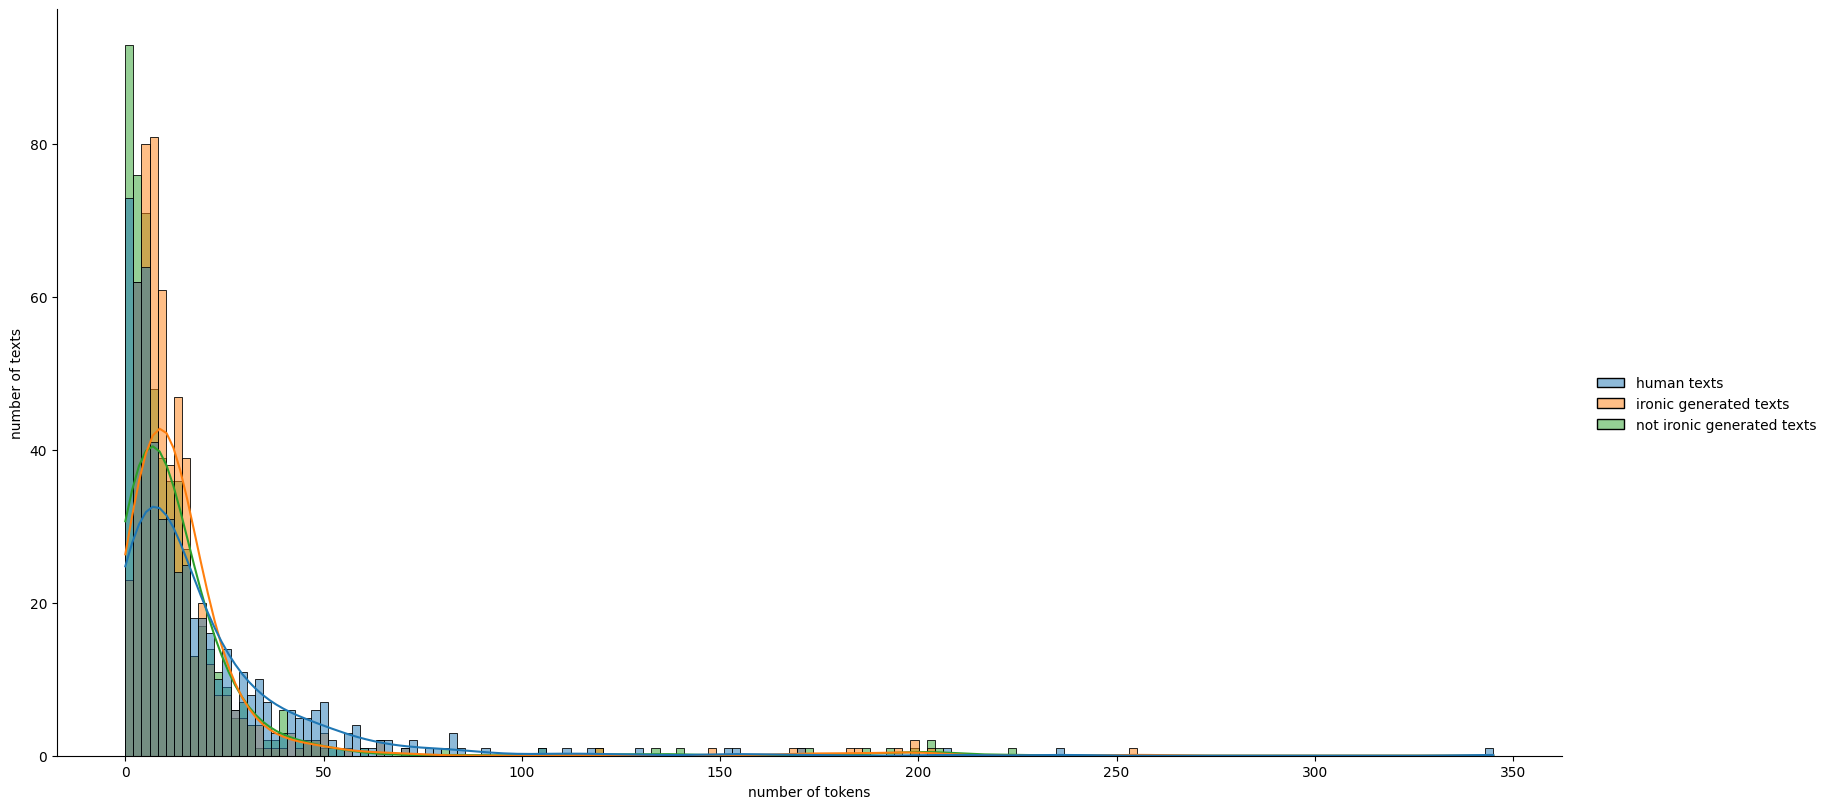

In [9]:
fig = sns.displot(data=df_token_comparison, kde=True, height=8, aspect=2)
# plt.figsize(10,10)
plt.xlabel("number of tokens")
plt.ylabel("number of texts")
plt.show(fig)

https://www.geeksforgeeks.org/seaborn-kdeplot-a-comprehensive-guide/

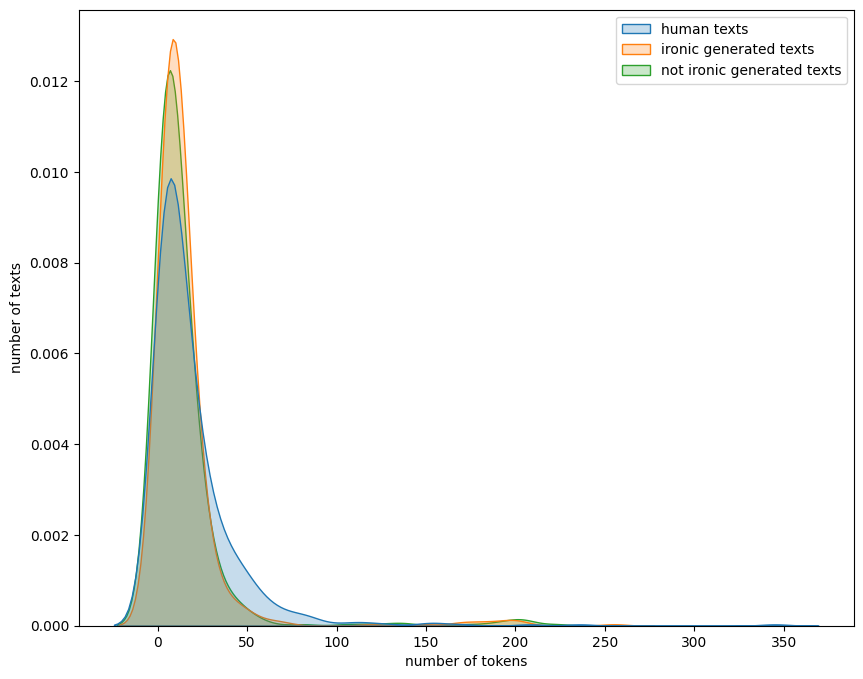

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_token_comparison, fill=True, ax=ax)
plt.xlabel("number of tokens")
plt.ylabel("number of texts")
plt.show(fig)

## interjection

In [13]:

def get_interjection(list_txt):
    nlp = spacy_udpipe.load('en')
    interjections=[]
    for i in list_txt:
        txt = nlp(i)
        for t in txt:
            if t.pos_ == 'INTJ':
                # print(t.pos_)
                interjections.append(t.lemma_)
    return interjections

o_int= get_interjection(df_iro['text'].tolist())

g_int= get_interjection(df_iro['aggregated'].tolist())
g_not_int = get_interjection(df_not['aggregated'].tolist())

print('mean parent: ', round(np.average(len(get_interjection(df_iro['parent_text'].tolist())))))
print('mean original text: ', round(np.average(len(o_int))))
print("mean original (iro): ",round(np.average(len(get_interjection(original_iro['text'].tolist())))))
print("mean original (not): ",round(np.average(len(get_interjection(original_not['text'].tolist())))))
print()
print('mean generated (iro): ', round(np.average(len(g_int))))
print('mean generated (not): ', round(np.average(len(g_not_int))))


mean parent:  56
mean original text:  63
mean original (iro):  18
mean original (not):  45

mean generated (iro):  37
mean generated (not):  74


In [14]:
print(o_int)
print()
print(g_int)

['Ahh', 'yes', 'well', 'hi', 'yes', 'yes', 'well', 'please', 'Hahaha', 'Hah', 'yes', 'hi', 'no', 'lol', 'no', 'well', 'haha', 'right', 'no', 'lol', 'know', 'yes', 'hi', 'lol', 'oh', 'o', 'yeah', 'no', 'well', 'please', 'oh', 'yes', 'please', 'well', 'good', 'wow', 'well', 'yep', 'yes', 'well', 'yes', 'nope', 'yes', 'yes', 'please', 'hello', 'hi', 'yes', 'yeah', 'kuchh', 'vaisa', 'hi', 'right', 'Damm', 'yes', 'hi', 'please', 'oh', 'amen', 'yep', 'yes', 'okay', 'welcome']

['yeah', 'yeah', 'gm', 'yeah', 'no', 'yes', 'no', 'no', 'right', 'yeah', 'oh', 'yeah', 'yeah', 'yep', 'no', 'no', 'yeah', 'yeah', 'no', 'no', 'yep', 'please', 'no', 'yeah', 'yeah', 'like', 'no', 'yeah', 'yeah', 'no', 'yeah', 'yeah', 'no', 'yeah', 'yeah', 'yes', 'no']


## Negations

In [13]:
def get_negation (list_txt):
    nlp = spacy.load("en_core_web_lg")
    negations = []
    for i in list_txt:
        txt = nlp(i)
        for token in txt:
            if token.dep_ == "neg":
                negations.append(token.text)
    
    return negations

o_neg= get_negation(df_iro['text'].astype(str).tolist())

g_neg= get_negation(df_iro['aggregated'].astype(str).tolist())
g_not_neg = get_negation(df_not['aggregated'].astype(str).tolist())

print('mean parent: ', round(np.average(len(get_negation(df_iro['parent_text'].astype(str).tolist())))))
print('mean original text: ', round(np.average(len(o_neg))))
print("mean original (iro): ",round(np.average(len(get_negation(original_iro['text'].astype(str).tolist())))))
print("mean original (not): ",round(np.average(len(get_negation(original_not['text'].astype(str).tolist())))))
print()
print('mean generated (iro): ', round(np.average(len(g_neg))))
print('mean generated (not): ', round(np.average(len(g_not_neg))))

mean parent:  196
mean original text:  153
mean original (iro):  31
mean original (not):  122

mean generated (iro):  168
mean generated (not):  303


In [14]:
g_not_neg

['not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 "n't",
 'never',
 'not',
 "n't",
 'not',
 'not',
 "n't",
 "n't",
 'not',
 'never',
 "n't",
 "n't",
 "n't",
 "n't",
 'not',
 "n't",
 "n't",
 "n't",
 "n't",
 'not',
 "n't",
 "n't",
 'not',
 "n't",
 'never',
 'not',
 "n't",
 'not',
 'not',
 "n't",
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 'not',
 "n't",
 "n't",
 "n't",
 "n't",
 "n't",
 "n't",
 'not',
 'not',
 'Not',
 'not',
 "n't",
 'not',
 "n't",
 "n't",
 'Not',
 'not',
 'not',
 'never',
 "n't",
 'not',
 'not',
 'both',
 'not',
 "n't",
 'n’t',
 'not',
 'not',
 'not',
 'not',
 "n't",
 "n't",
 'never',
 'never',
 'never',
 'not',
 'n’t',
 "n't",
 "n't",
 "n't",
 "n't",
 'not',
 "n't",
 "n't",
 "n't",
 "n't",
 "n't",
 'not',
 "n't",
 "n't",
 "n't",
 "n't",
 

## type token ratio

a low ttr indicates a low degree of lexical variation (calculated among all the replies)

In [15]:
def ttr(lista):
    tokens=[]
    for i in lista:
        l = tokenizer(i)
        # print(l)
        tokens.extend(l)
        # print(tokens)
    ttr = len(list(set(tokens)))/len(tokens)
    # print(ttr)
    return ttr


o_ttr= ttr(df_iro['text'].tolist())
o_ttr_iro = ttr(original_iro['text'].tolist())
o_ttr_not = ttr(original_not['text'].tolist())

g_ttr= ttr(df_iro['aggregated'].tolist())
g_ttr_not = ttr(df_not['aggregated'].tolist())

print("parent", round(ttr(df_iro['parent_text'].tolist()),3))
print('original: ', round(o_ttr, 3))
print('original (iro): ',  round(o_ttr_iro, 3))
print('original (not): ',  round(o_ttr_not, 3))
print()
print('generated (iro): ', round(g_ttr, 3))
print('generated (not): ', round(g_ttr_not, 3))


parent 0.246
original:  0.284
original (iro):  0.417
original (not):  0.305

generated (iro):  0.19
generated (not):  0.18


## named entities

In [16]:
def list_entities(df, column_text, column_id):
    # list_txt = df[column_text].tolist()
    labels= ['WORK_OF_ART', 'ORG', 'PERSON', 'GPE', 'LOC', 'EVENT', 'NORP', 'PRODUCT', 'DATE', 'LANGUAGE', 'LAW']    
    nlp = spacy.load("en_core_web_lg")
    entities = []
    id_entities = {id: [] for id in df[column_id]}

    texts = df[column_text].tolist()
    ids = df[column_id].tolist()

    for txt, id in zip(texts, ids):
        doc = nlp(str(txt))
        for t in doc.ents:
             if t.label_ in labels:
                entities.append(t.text)
                id_entities[id].append(t.text)
        
    # print(list(set(entities)))
    # print(id_entities)
    return len(entities), id_entities

o_ent, dict_o_ents = list_entities(df_iro,'text', 'id_original')
g_ent, dict_g_ents = list_entities(df_iro, 'aggregated', 'id_original')
parent_ent, dict_parent_ents = list_entities(df_iro,"parent_text", "id_original")

print('parent:')
print('\t', parent_ent)
print('original:')
print('\t', o_ent)
print('generated:')
print('\t',g_ent)

parent:
	 656
original:
	 433
generated:
	 248


#### iro

In [78]:
df_ner_parent = pd.DataFrame(dict_parent_ents.items(), columns=["id_original", "ner_parent"])
df_ner_o = pd.DataFrame(dict_o_ents.items(), columns=["id_original", "ner_original"])
df_ner_g = pd.DataFrame(dict_g_ents.items(), columns=["id_original", "ner_aggregated"])

df_ner = pd.merge(df_ner_parent, df_ner_g, on="id_original")
df_ner = pd.merge(df_ner, df_iro[["id_original", "parent_text","aggregated"]], on="id_original")

In [18]:
count_parent = 0
count_generated =0
count_match =0
list_matches = []
list_ner_iniro = []

for key,value in dict_parent_ents.items():
    if len(value) != 0:
         count_parent +=1
    for k,v in dict_g_ents.items():
        if key == k:
            if len(value) != 0 and len(v) != 0:
                    count_match +=1
                    list_matches.append(key)

for k,v in dict_g_ents.items():
    if len(v) != 0:
        count_generated +=1
        list_ner_iniro.append(k)

print("full values in parent: ", count_parent)
print("full values in generated: ", count_generated)
print("matching cases: ", count_match)

full values in parent:  317
full values in generated:  132
matching cases:  110


In [20]:
df_ner_match = df_ner[df_ner.id_original.isin(list_ner_iniro)].reset_index(drop=True)
df_ner_match.to_csv(DIR + "theGIRLS/linguistic analysis/annotazione_manuale/ner.csv")

In [21]:
print(list_matches)

['fjchmrs', '1572561433304637440', 'fj758no', 'fj5kw97', 'fjcsqi4', 'fj8c3qo', 'fj51sas', 'fj71lon', 'fj663p8', 'fjbutri', '1572500396740079617', 'fj8z6lp', 'fj5cgh5', 'fj99kst', 'fj5sf0v', '1538196057645006848', 'fjepd7j', 'fj9huus', 'fjeolh4', 'fja52qx', 'fj8yz0z', '1580526450050232320', '1580499888298553349', '1578348641801994241', 'fj9rgna', 'fj7emio', 'fjdvuoi', 'fjarnof', 'fj9lkik', 'fjc0eap', 'fj8eio3', '1538244300340862978', 'fjcmpry', 'fj950ag', 'fja1mj0', 'fj5a9n4', '1577664879720177669', '1572503030855245824', '1579718981027475456', 'fj5tdy2', 'fj7akwm', '1572501168001290242', 'fj7nf04', '1572519216678596608', 'fj68s8r', '1572492316908060672', 'fj8lsj9', 'fj65hzw', 'fj54kus', '1578284701130768386', 'fj8np0e', 'fj7lzl7', 'fjcfl0e', 'fjcbyzn', '1578645387061399552', 'fjae6dj', 'fj52u3e', '1578338475841290240', 'fjckasp', 'fj9r7h0', 'fj93pco', '1572501106613424128', '1538217355905581058', 'fj67ro9', 'fj6caaj', '1572500662725873664', 'fj5aysi', 'fjcl5i7', 'fjdb8zq', 'fjalljc', '

#### not iro

In [80]:
g_ent_not, dict_g_ents_not = list_entities(df_not, 'aggregated', 'id_original')

count_parent = 0
count_generated =0
count_match =0
list_ner_innot = []


for key,value in dict_parent_ents.items():
    if len(value) != 0:
         count_parent +=1
    for k,v in dict_g_ents_not.items():
        if key == k:
            if len(value) != 0 and len(v) != 0:
                    count_match +=1

for k,v in dict_g_ents_not.items():
    if len(v) != 0:
        count_generated +=1
        list_ner_innot.append(k)

print("full values in parent: ", count_parent)
print("full values in generated: ", count_generated)
print("matching cases: ", count_match)
print(g_ent_not)

full values in parent:  317
full values in generated:  148
matching cases:  115
315


In [81]:
df_ner_parent = pd.DataFrame(dict_parent_ents.items(), columns=["id_original", "ner_parent"])
df_ner_o = pd.DataFrame(dict_o_ents.items(), columns=["id_original", "ner_original"])
df_ner_g = pd.DataFrame(dict_g_ents_not.items(), columns=["id_original", "ner_aggregated"])

df_ner = pd.merge(df_ner_parent, df_ner_g, on="id_original")
df_ner = pd.merge(df_ner, df_not[["id_original", "parent_text","aggregated"]], on="id_original")

In [82]:
df_ner_match = df_ner[df_ner.id_original.isin(list_ner_innot)].reset_index(drop=True)
df_ner_match.to_csv(DIR + "theGIRLS/linguistic analysis/annotazione_manuale/ner_not.csv")

## Emotions and Sentiment

#### Lemmatize iro

In [22]:
import re 

lemmatized_text = []
for i, t in enumerate(df_iro["aggregated"]):
    # print(i)
    s = lemmatize_spacy(t)
    # print(s)
    lemmatized_text.append(s)

len(lemmatized_text)

lemmatized_aggregated = []
for i in lemmatized_text:
    t = i.replace('[', '')
    t = t.replace(']', '')
    t = t.replace("'", '')
    t = re.sub(r',', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    lemmatized_aggregated.append(t)
print(len(lemmatized_aggregated))

print(lemmatized_text[:3])

lemmatized_aggregated[:3]

540
['new trend ask sir sentence', 'legal coastguard boat doesn t sink', 'm sure irish irish american american irish ireland america american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american']


['new trend ask sir sentence',
 'legal coastguard boat doesn t sink',
 'm sure irish irish american american irish ireland america american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american american irish irish american']

#### Lemmatize parent

In [23]:
df_iro = df_iro.astype(str)

lemmatized_ptext = []
for i, t in enumerate(df_iro["parent_text"]):
    # print(i)
    s = lemmatize_spacy(t)
    # print(s)
    lemmatized_ptext.append(s)

len(lemmatized_ptext)


lemmatized_parent = []
for i in lemmatized_ptext:
    t = i.replace('[', '')
    t = t.replace(']', '')
    t = t.replace("'", '')
    t = re.sub(r',', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    lemmatized_parent.append(t)
print(len(lemmatized_parent))

print(lemmatized_ptext[:3])

lemmatized_parent[:3]

540
['sir u start', 'legal coastguard lad allow batter ve get ashore', 'fuck m irish american s right march m irish bro don t irish irish don t irish irish nan pop bear raise ireland dad teach irish irish stop irish think march parade edit m leave guy downvote hell like shit s m irish know m irish ve get passport prove problem get to open fucking eye stop goddamn judgemental fucking tell people irish shame']


['sir u start',
 'legal coastguard lad allow batter ve get ashore',
 'fuck m irish american s right march m irish bro don t irish irish don t irish irish nan pop bear raise ireland dad teach irish irish stop irish think march parade edit m leave guy downvote hell like shit s m irish know m irish ve get passport prove problem get to open fucking eye stop goddamn judgemental fucking tell people irish shame']

In [24]:
df_iro["lemmatized_aggregated"] = lemmatized_aggregated
df_iro["lemmatized_parent"] = lemmatized_parent

#### sentiment 
verifica ultima versione di Sentiword su nltk

https://www.kaggle.com/code/yommnamohamed/sentiment-analysis-using-sentiwordnet


sentiment analysis Pier
https://colab.research.google.com/drive/1nrSOJbCEomFZb6quZZL3GIpOWLyolsiD

In [25]:
import nltk 

In [26]:
df_generated = df_iro[['id_original', 'aggregated',
       'lemmatized_aggregated']]
df_parent = df_iro [['id_original', 'parent_text', 'lemmatized_parent']]

In [27]:
pos=neg=obj=count=0

postagging = []

for txt in df_generated['lemmatized_aggregated']:
    list = tokenizer(txt)
    postagging.append(nltk.pos_tag(list))

df_generated['pos_tags'] = postagging


postagging = []
for txt in df_parent['lemmatized_parent']:
    list = tokenizer(txt)
    postagging.append(nltk.pos_tag(list))

df_parent['pos_tags'] = postagging


/tmp/ipykernel_4345/1745887977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generated['pos_tags'] = postagging
/tmp/ipykernel_4345/1745887977.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parent['pos_tags'] = postagging


In [28]:
from utils import SentimentAnalysis

df_generated = SentimentAnalysis.extract_sentiment(df_generated)
df_generated = SentimentAnalysis.overall_sentiment(df_generated)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marem/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/marem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/marem/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


[0.375, 0.0, -0.25, 0.0, 0.5, 0.25, 0.0, 0, -0.375, -0.375, 0.0, 0.0, -0.375, 0.125, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.75, 0.125, 0.5, 0.0, 0.625, -0.375, 0.125, -0.625, -0.125, -0.375, -0.25, 0.0, 0.25, 0.25, -0.25, 0.0, 0.5, 0.625, -0.125, 0.25, -0.625, -0.375, 0.125, -0.125, 0.125, -0.125, 0.375, 0, 0.125, 0.0, -0.25, -1.125, 0.0, 0, -0.25, 0.0, -0.375, -0.25, -0.375, 0, 0.0, 0.0, 0.0, -0.25, 0.0, -0.5, -0.75, -0.25, 0.0, 0.0, 0.0, 0.25, -0.25, -1.25, -0.625, 0.5, 0, 0.0, 0.0, 0.625, 1.625, -0.25, -0.25, 0.125, 0.0, 1.125, 0.0, 2.125, -0.25, 0, 0.0, 0.0, 0.0, -0.625, 0.0, 0.0, 1.375, -0.125, 0.25, 0.0, 0.0, -0.375, 0.0, -0.25, 0.0, -0.25, 0.0, -0.125, 0.625, 0, 0, -0.25, 0, 0.0, -0.25, 0, 0.125, 0.0, 0.0, 0, 0.0, 0.75, 0, -0.5, -0.125, 0.0, 0.0, 0.0, 0, 0.0, 0.0, -0.25, 0.0, -0.625, 0.0, 0.625, 0.125, 0.5, 0.25, 0.0, -0.25, 0.0, -0.75, 0.0, -0.125, -0.125, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.375, -0.625, 0.0, 0.5, 0.0, -0.125, -0.75, 0.

/home/marem/VscProjects/theGIRLS/linguistic analysis/utils/SentimentAnalysis.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['senti_score'] = senti_score
/home/marem/VscProjects/theGIRLS/linguistic analysis/utils/SentimentAnalysis.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_sentiment']=overall


In [29]:
df_generated

,id_original,aggregated,lemmatized_aggregated,pos_tags,senti_score,overall_sentiment
0,1579703654491516928,A new trend of asking sir after every sentence,new trend ask sir sentence,"[(new, JJ), (trend, NN), (ask, NN), (sir, JJ),...",0.375,Positive
1,fja7187,Make it legal for the coastguard to have a boa...,legal coastguard boat doesn t sink,"[(legal, JJ), (coastguard, NN), (boat, NN), (d...",0.000,Neutral
2,fjchmrs,"I’m sure you’re Irish, but you’re not Irish Am...",m sure irish irish american american irish ire...,"[(m, JJ), (sure, JJ), (irish, JJ), (irish, JJ)...",-0.250,Negative
3,fj6h14n,I think you need to read the article again.,think need read article,"[(think, VBP), (need, MD), (read, VB), (articl...",0.000,Neutral
4,fjcu4vq,I'm glad you enjoyed them. I'm sure they'll be...,m glad enjoy m sure ll good seller,"[(m, NN), (glad, NN), (enjoy, VBP), (m, JJ), (...",0.500,Positive
...,...,...,...,...,...,...
535,1578297418126626818,There is no other news.,news,"[(news, NN)]",0.000,Neutral
536,1572500273485971457,Where's the catch,s catch,"[(s, NNS), (catch, NN)]",-0.500,Negative
537,fj8btvv,I'm sure the farmer is very happy with his new...,m sure farmer happy new field drain,"[(m, JJ), (sure, JJ), (farmer, NN), (happy, JJ...",1.000,Positive
538,fj7290e,I'm sorry for your hand but that's the funnies...,m sorry hand s funny thing ve read day,"[(m, NN), (sorry, JJ), (hand, NN), (s, VBD), (...",0.375,Positive


In [30]:
df_parent = SentimentAnalysis.extract_sentiment(df_parent)
df_parent = SentimentAnalysis.overall_sentiment(df_parent)

[0.0, 0.0, -1.5, 0.75, 0.5, 0.0, 0.25, -0.25, -0.375, 0.375, 0.75, 0.0, 0.0, 0.125, 0.375, -2.625, 0.125, 0.0, -0.5, 0.0, -0.375, 1.0, 0.0, -0.75, 0.75, -0.125, 1.0, 1.75, 0.0, 1.375, -0.375, 0.0, 0.5, 0.5, 0.5, 0.125, 0.0, 0.75, 0.625, -0.125, 0.375, 0.0, 0.375, 0.5, 0.125, 0.0, 0.125, 0.0, -0.25, 0.375, -0.25, 0.5, -0.125, 0.0, 0.125, 0.0, 0.5, -0.5, -0.5, -0.5, -0.125, -0.375, -0.625, -0.125, 0.0, -1.625, 0, -0.625, -0.75, 0.0, -0.75, 0.25, 0.5, -0.5, 0.625, 0.375, 0.5, 0, 0.0, 0.5, 1.875, 0.125, -0.125, 1.125, 0.625, 0.25, 0, 0.25, -0.375, 0.0, 0.0, 0.125, 0.0, 0.0, -0.125, 0.0, 1.375, 0.375, 0.125, 0.25, 0.625, -0.625, 0.0, 0.25, -0.625, 0.125, -0.375, -0.625, 0.0, 0.0, 0.75, 0.125, 0.125, -0.75, 1.75, 0.25, 0.125, 0.375, 0.0, 1.0, 0.375, 1.0, 0.75, 0.0, -0.125, 0.125, 0.0, 0.0, 0, 0.125, 0.0, 1.0, -0.125, 0.0, 0.25, 0.0, 0.0, 0.25, 0.625, 0.875, 0.875, -0.125, 0.0, 0, 0.0, -0.125, 0.625, 0.0, 1.5, 0.625, -0.25, 0.0, 0.0, 0.0, 0.0, 0.5, 1.375, 0.5, 0.125, 0.75, 0.0, 0.0, 0.0, 0.25

/home/marem/VscProjects/theGIRLS/linguistic analysis/utils/SentimentAnalysis.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['senti_score'] = senti_score
/home/marem/VscProjects/theGIRLS/linguistic analysis/utils/SentimentAnalysis.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_sentiment']=overall


In [31]:
keep_same = {'id_original', 'aggregated', 'lemmatized_aggregated'}
df_generated.columns = ['{}{}'.format(c, '' if c in keep_same else '_aggregated') 
                     for c in df_generated.columns]

keep_same = {'id_original', 'parent_text', 'lemmatized_parent'}
df_parent.columns = ['{}{}'.format(c, '' if c in keep_same else '_parent') 
                     for c in df_parent.columns]

In [32]:
df_generated.columns

Index(['id_original', 'aggregated', 'lemmatized_aggregated',
       'pos_tags_aggregated', 'senti_score_aggregated',
       'overall_sentiment_aggregated'],
      dtype='object')

In [33]:
df_parent.columns

Index(['id_original', 'parent_text', 'lemmatized_parent', 'pos_tags_parent',
       'senti_score_parent', 'overall_sentiment_parent'],
      dtype='object')

In [34]:
comparison = pd.merge(df_parent[["id_original", "overall_sentiment_parent"]], 
                      df_generated[["id_original", "overall_sentiment_aggregated"]], 
                      on="id_original",
                      how="left")

In [35]:
comparison

,id_original,overall_sentiment_parent,overall_sentiment_aggregated
0,1579703654491516928,Neutral,Positive
1,fja7187,Neutral,Neutral
2,fjchmrs,Negative,Negative
3,fj6h14n,Positive,Neutral
4,fjcu4vq,Positive,Positive
...,...,...,...
535,1578297418126626818,Neutral,Neutral
536,1572500273485971457,Positive,Negative
537,fj8btvv,Positive,Positive
538,fj7290e,Negative,Positive


In [36]:
s = pd.crosstab(comparison["overall_sentiment_aggregated"], comparison["overall_sentiment_parent"])

s

overall_sentiment_parent,Negative,Neutral,Positive
overall_sentiment_aggregated,,,
Negative,59,29,67
Neutral,60,91,92
Positive,25,32,85


In [37]:
print(df_generated["overall_sentiment_aggregated"].value_counts(normalize=True))

overall_sentiment_aggregated
Neutral     0.450000
Negative    0.287037
Positive    0.262963
Name: proportion, dtype: float64


#### emotions
Codice di Simona

In [38]:
import ast
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

def dict_tfidf (df, column):

    list_token = []

    cv = TfidfVectorizer(analyzer='word',
                    encoding='utf-8',
                    ngram_range=(1, 1),
                    smooth_idf=True,
                    norm='l2',
    )

    X = df[column].tolist()
    tfidf_matrix = cv.fit_transform(X)
    list_tokens = cv.get_feature_names_out()

    d_index = cv.vocabulary_

    l_index=[]
    l_tokens=[]
    l_scores=[]
    for txt in range(len(X)):
        feature_index = tfidf_matrix[txt,:].nonzero()[1]#--> è una tupla di 2 array: uno contenente l'index della frase e il secondo contenente gli indici delle parole
        # l_index.extend(feature_index)
        tfidf_scores = zip(feature_index, [tfidf_matrix[txt,x] for x in feature_index])
        # print(tfidf_scores)
        for i, w, s in [(i, list_tokens[i], s) for i, s in tfidf_scores]:
            # print(i, w, s)
            l_index.append(i)
            l_tokens.append(w)
            l_scores.append(round(s, 3))
    zipOfIb=zip(l_tokens, l_scores)
    dict_tfidf=dict(zipOfIb)
    print('dict tfidf created: ', len(dict_tfidf.keys()))
    print('max and min values in dict_tfidf: ', max(dict_tfidf.values()), min(dict_tfidf.values()))

    return list_token, dict_tfidf

In [39]:
list_token_agg, dict_tfidf_agg = dict_tfidf(df_iro, "lemmatized_aggregated")
list_token_parent, dict_tfidf_parent = dict_tfidf(df_iro, "lemmatized_parent")

dict tfidf created:  1245
max and min values in dict_tfidf:  1.0 0.034
dict tfidf created:  2935
max and min values in dict_tfidf:  1.0 0.04


In [40]:
from utils import FeaturesExtraction
d_nrc = FeaturesExtraction.load_emotional_lexica(lang='en')

---- load NRC


/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


  English (en)  Positive  Negative  Anger  Anticipation  Disgust  Fear  Joy   
0        aback         0         0      0             0        0     0    0  \
1       abacus         0         0      0             0        0     0    0   
2      abandon         0         1      0             0        0     1    0   

   Sadness  Surprise  Trust  
0        0         0      0  
1        0         0      1  
2        1         0      0  
14182


In [41]:
from utils import FeaturesExtraction
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline
import numpy as np

def model_features(X, X_lem, ids, dict_tfidf, d_nrc, lang='en'):
    # print(len(X))
    print('***** build features model *****')
    
    model_feat_1 =  FeatureUnion([
            ('pip_emotion', Pipeline([
                ('EmotionLexicon', FeaturesExtraction.emotion_lex(dictionary_tfidf=dict_tfidf, lexicon=d_nrc)),
                ('scaler', MinMaxScaler()), #--> default range [0,1]
                ])
            )
        ])
    
    model_feat_2 = FeatureUnion([
            ('pip_sintassi', Pipeline([
                ('Sintassi', FeaturesExtraction.sintactic_features(dictionary=dict_tfidf, lang='en')), 
                ('scaler', MinMaxScaler()),
                    ])
            ),
            ('pip_nu', Pipeline([
                ('NU', FeaturesExtraction.nominal_utterances(dictionary=dict_tfidf, lang='en')), 
                ('scaler', MinMaxScaler()), 
                    ])
            )        
        ])
            
    print('***** learn features *****')
    t1 = model_feat_1.fit_transform(X_lem) 
    print('transformer1: ', t1.shape, t1.ndim, type(t1))
    t2 = model_feat_2.fit_transform(X) 
    print('transformer2: ', t2.shape, t2.ndim, type(t2))
    
    df1=pd.DataFrame(t1)
    df2=pd.DataFrame(t2)

    columns_t2 = ['intens','discourse','loc_avv','menzioni', 'n_nu', 'nu']
    columns_t1=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 
                 'surp', 'trust', 'std_joy_sad','std_trust_disg','std_fear_ang',
                  'std_surp_ant','aggressiveness','contempt','remorse',
                  'disapproval','awe','submission','love','optimism',
                  'std_agg_awe','std_cont_sub','std_rem_love', 'std_dis_opt']
    
    
    columns = columns_t1+columns_t2
    print('len feats: ', len(columns))

    df = pd.concat([df1, df2], axis=1)
    df.columns=columns

    print('len ids: ', len(ids))
    df.insert(0,'id',ids)
    df.insert(1,'text',X)
    # df.insert(2,'label',y)
    
    print('df features: ', df.shape)
    # print(df.head(3))
    return df

In [42]:
df_aggregated_feat = model_features(df_iro['aggregated'].tolist(), lemmatized_aggregated, df_iro['id_original'].tolist(), dict_tfidf_agg, d_nrc, lang='en')
df_parent_feat = model_features(df_iro["parent_text"].tolist(), lemmatized_parent, df_iro['id_original'].tolist(), dict_tfidf_parent, d_nrc, lang='en')

***** build features model *****
***** learn features *****


/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


transformer1:  (540, 24) 2 <class 'numpy.ndarray'>
Already downloaded a model for the 'en' language
Already downloaded a model for the 'en' language
transformer2:  (540, 6) 2 <class 'numpy.ndarray'>
len feats:  30
len ids:  540
df features:  (540, 32)
***** build features model *****
***** learn features *****


/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/marem/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


transformer1:  (540, 24) 2 <class 'numpy.ndarray'>
Already downloaded a model for the 'en' language
Already downloaded a model for the 'en' language
transformer2:  (540, 6) 2 <class 'numpy.ndarray'>
len feats:  30
len ids:  540
df features:  (540, 32)


In [43]:

df_aggregated_feat_ = df_aggregated_feat[['id','anger', 'anticipation', 'disgust', 'fear', 'joy',
                                           'sadness','surp', 'trust']]#,'aggressiveness','contempt','remorse', 'disapproval','awe','submission','love','optimism']]

df_parent_feat_ = df_parent_feat[['id','anger', 'anticipation', 'disgust', 'fear', 'joy',
                                  'sadness','surp', 'trust']]#,'aggressiveness','contempt','remorse', 'disapproval','awe','submission','love','optimism']]

In [44]:
keep_same = {'id'}
df_aggregated_feat_.columns = ['{}{}'.format(c, '' if c in keep_same else '_aggregated') 
                     for c in df_aggregated_feat_.columns]
df_parent_feat_.columns = ['{}{}'.format(c, '' if c in keep_same else '_parent') 
                     for c in df_parent_feat_.columns]

In [45]:
correlation = pd.merge(df_parent_feat_, df_aggregated_feat_, on="id")

In [46]:
features = ['anger_aggregated', 'anticipation_aggregated',
       'disgust_aggregated', 'fear_aggregated', 'joy_aggregated',
       'sadness_aggregated', 'surp_aggregated', 'trust_aggregated',
       #'aggressiveness_aggregated', 'contempt_aggregated',
       #'remorse_aggregated', 'disapproval_aggregated', 'awe_aggregated',
       #'submission_aggregated', 'love_aggregated', 'optimism_aggregated',
       'anger_parent', 'anticipation_parent', 'disgust_parent',
       'fear_parent', 'joy_parent', 'sadness_parent', 'surp_parent',
       'trust_parent', 
       #'aggressiveness_parent', 'contempt_parent',
       #'remorse_parent', 'disapproval_parent', 'awe_parent',
       #'submission_parent', 'love_parent', 'optimism_parent'
       ]

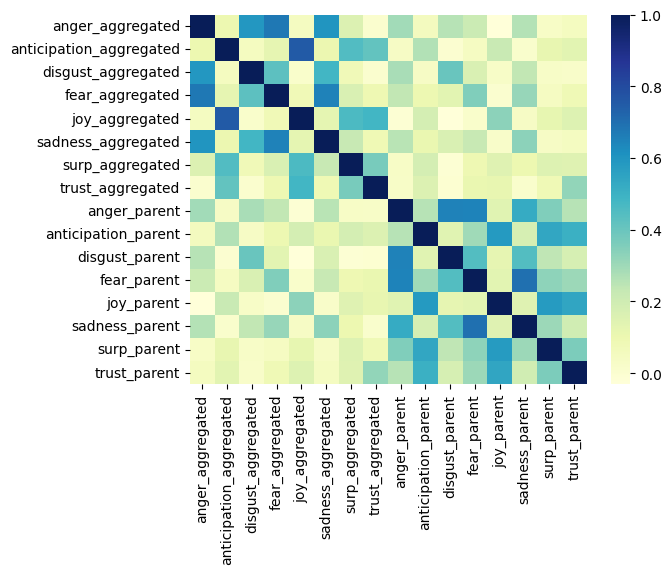

In [47]:
dataplot = sns.heatmap(correlation[features].corr(), cmap="YlGnBu") 

## Nominal utterance

In [48]:
nlp = spacy.load("en_core_web_lg")
def nominal_utterance(sent):
    doc = nlp(sent)

    for token in doc: 
        if token.pos_ == "NOUN" or token.pos_ == "PROPN" or token.pos_ == "PRON":
            if len([child for child in token.children]) >0:
                for child in token.children:
                    if child.pos_=='NOUN' or child.pos_=='ADJ' or child.pos_=='ADV' or child.pos_=='PROPN' or child.pos_=='NUM':
                         return True

        elif (token.pos_=='VERB' or token.pos_=='ADJ' or token.pos_=='ADV') and (token.dep_=='nsubj' or token.dep_=='obl' or token.dep_=='obj' or token.dep_=='iobj'):
            if len([child for child in token.children]) >0:
                for child in token.children:
                    if child.pos_=='NOUN' or child.pos_=='ADJ' or child.pos_=='ADV' or child.pos_=='PROPN' or child.pos_=='NUM':
                        return True

        else:
            return False                

In [49]:
df_nominal = df_iro[['id_original']]
df_nominal["nominal_iro_aggregated"] = df_iro["aggregated"].apply(nominal_utterance) #.fillna(True)
df_nominal["nominal_not_aggregated"] = df_not["aggregated"].apply(nominal_utterance) #.fillna(True)

/tmp/ipykernel_4345/1678610649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nominal["nominal_iro_aggregated"] = df_iro["aggregated"].apply(nominal_utterance) #.fillna(True)
/tmp/ipykernel_4345/1678610649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nominal["nominal_not_aggregated"] = df_not["aggregated"].apply(nominal_utterance) #.fillna(True)


In [50]:
print(df_nominal["nominal_iro_aggregated"].value_counts())
print()
print(df_nominal["nominal_not_aggregated"].value_counts())

nominal_iro_aggregated
False    524
True       9
Name: count, dtype: int64

nominal_not_aggregated
False    496
True      26
Name: count, dtype: int64


## Syntactical complexity

In [10]:
# def get_tree_height(token):
#     if not any(token.children):
#         return 1 #If the token has no children, the height is 1.
#     else:
#         return 1 + max(get_tree_height(child) for child in token.children) # the height is 1 plus the maximum height of its children's subtrees.

# def get_sentence_tree_height(sentence):
#     nlp = spacy.load("en_core_web_lg")
#     doc = nlp(sentence)
#     for sent in doc.sents: 
#         roots = [token for token in sent if token.head == token] #finds the head
#         if not roots:
#             return 0
#         return max(get_tree_height(root) for root in roots) #calculate the hegith starting from the root 

# def print_tree(token, level=0):
#     print("  " * level + f"{token.text} ({token.dep_})")
#     for child in token.children:
#         print_tree(child, level + 1)

In [11]:
nlp = spacy.load("en_core_web_lg")

def get_tree_height(token):
    if not any(token.children):
        return 1  # If the token has no children, the height is 1.
    else:
        return 1 + max(get_tree_height(child) for child in token.children)  # The height is 1 plus the maximum height of its children's subtrees.

def get_sentence_tree_height(doc):
    heights = []
    for sent in doc.sents: 
        roots = [token for token in sent if token.head == token]  # Find the head
        if not roots:
            heights.append(0)
        else:
            heights.append(max(get_tree_height(root) for root in roots))
    return heights

def calculate_tree_heights(df, column_name,new_column_name):
    # Use nlp.pipe to process the sentences in batches
    sentences = df[column_name].tolist()
    docs = nlp.pipe(sentences)
    
    tree_heights = []
    for doc in docs:
        heights = get_sentence_tree_height(doc)
        if heights:
            tree_heights.append(heights[0])  # Assuming one sentence per row
        else:
            tree_heights.append(0)
    
    df[new_column_name] = tree_heights
    return df

In [20]:
# Example usage
df_complexity_iro = df_iro[["id_original","aggregated"]].rename(columns={"aggregated": "aggregated_iro"})
df_complexity_not = df_not[["id_original","aggregated"]].rename(columns={"aggregated": "aggregated_not"})
df_complexity_human = df_iro[["id_original","text"]]

df_complexity_iro = calculate_tree_heights(df_complexity_iro, 'aggregated_iro', "IRO model")
df_complexity_not = calculate_tree_heights(df_complexity_not, 'aggregated_not', "NIRO model")
df_complexity_human = calculate_tree_heights(df_complexity_human, 'text', "Human reply")

df_complexity = pd.merge(df_complexity_iro, df_complexity_not, on="id_original")
df_complexity = pd.merge(df_complexity, df_complexity_human, on="id_original")

/tmp/ipykernel_63095/4023919177.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = tree_heights


In [21]:
df_complexity

,id_original,aggregated_iro,IRO model,aggregated_not,NIRO model,text,Human reply
0,1579703654491516928,A new trend of asking sir after every sentence,6,"Nothing, I'm on a 10 day water fast.",5,Coaching classes,3
1,fja7187,Make it legal for the coastguard to have a boa...,6,That would be a deterrent,3,They shouldn't be sent out to get them. Just g...,3
2,fjchmrs,"I’m sure you’re Irish, but you’re not Irish Am...",4,I'm not saying you're not Irish. I'm saying yo...,3,">And I’m as Irish as you, br\nYou're American",1
3,fj6h14n,I think you need to read the article again.,5,500cr for a wedding in a country where 1/3rd o...,11,Ahh yes the trickle-down economics. If you fee...,3
4,fjcu4vq,I'm glad you enjoyed them. I'm sure they'll be...,4,I loved the Dark Is Rising sequence by Susan C...,5,The most disappointing trailer since... well.....,5
...,...,...,...,...,...,...,...
535,1578297418126626818,There is no other news.,3,No wonder the ABC is under attack from the LNP...,7,Such lazy journalism,1
536,1572500273485971457,Where's the catch,3,Sent u a pm thanks,4,Did u get message I left you thanks,4
537,fj8btvv,I'm sure the farmer is very happy with his new...,7,"I don't think it's deep, it's just soft.",4,"True, but they probably would have been ok but...",10
538,fj7290e,I'm sorry for your hand but that's the funnies...,5,You are a mad man,3,Handwash karle,2


In [22]:
l = df_complexity["IRO model"].tolist()
text = df_complexity["aggregated_iro"].tolist()
count = 0
for i in range(len(l)):
    if l[i] > 20:
        print(text[i])

Yeah, we beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that beat the team that bea

In [24]:
df_complexity_clean = df_complexity.drop(df_complexity[df_complexity["IRO model"] == 128].index)
print(df_complexity.shape, df_complexity_clean.shape)

(540, 7) (539, 7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


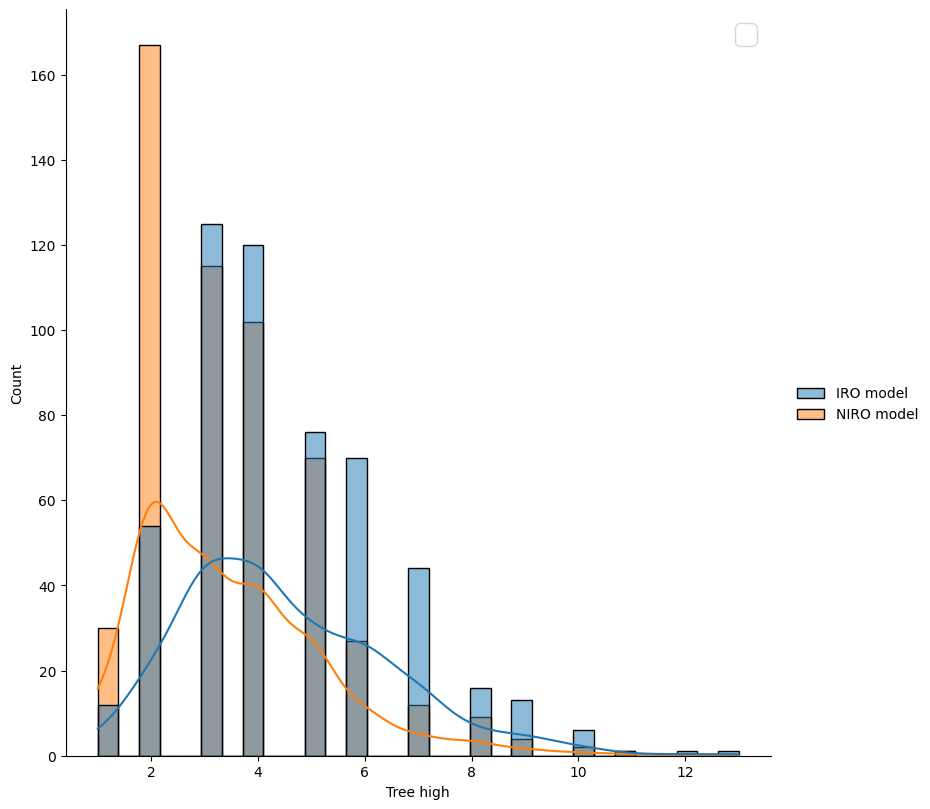

In [58]:
fig = sns.displot(data=df_complexity_clean[["IRO model","NIRO model"]], kde=True, height=8, aspect=1)
fig.set_axis_labels('Tree high', 'Count', fontsize=10)
# ax.set_ylabel('Percentage', fontsize=10)
plt.legend(fontsize=20)
fig.savefig("/home/marem/VscProjects/theGIRLS/linguistic analysis/plots/plot_syntactic_complxe1.png")

## Text similarity
https://medium.com/@ahmetmnirkocaman/how-to-measure-text-similarity-a-comprehensive-guide-6c6f24fc01fe


In [33]:
import gensim.downloader as api
from scipy.spatial.distance import cosine

# Load pre-trained word2vec model
model = api.load('word2vec-google-news-300')

In [34]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = get_average_word2vec(s1.split(), model)
    vector_2 = get_average_word2vec(s2.split(), model)
    if np.all(vector_1 == 0) or np.all(vector_2 == 0): #if one of the vectors is zero they are considered maximally dissimilar
        return 1.0
    cosine_distance = cosine(vector_1, vector_2)
    return 1-cosine_distance

str1 = "Your first text here"
str2 = "Your second text here"
print(cosine_distance_wordembedding_method(str1, str2))

0.9770016074180603


In [35]:
list_parent = df_iro["parent_text"].astype(str).tolist()
list_text = df_iro["text"].astype(str).tolist()
list_generated_iro = df_iro["aggregated"].astype(str).tolist()
list_generated_not = df_not["aggregated"].astype(str).tolist()
list_id = df_iro["id_original"].tolist()


dict_similarity = {}

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    generated_txt_iro= list_generated_iro[i]
    generated_txt_not= list_generated_not[i]
    id = list_id[i]
    computed_similarity_txt = cosine_distance_wordembedding_method(parent_txt,txt)
    computed_similarity_generated_iro = cosine_distance_wordembedding_method(parent_txt,generated_txt_iro)
    computed_similarity_generated_not = cosine_distance_wordembedding_method(parent_txt,generated_txt_not)
    dict_similarity[id]=[computed_similarity_txt,computed_similarity_generated_iro,computed_similarity_generated_not]

In [36]:
similarity_text = pd.DataFrame.from_dict(dict_similarity, orient="index", columns=["Human reply", "IRO model", "NIRO model"])

similarity_text.reset_index(inplace=True)
similarity_text.rename(columns={"index": "id_original"}, inplace=True)

In [23]:
similarity_text

,id_original,sim_text,sim_generated_iro,sim_generated_not
0,1579703654491516928,0.139909,0.460256,0.401841
1,fja7187,0.739349,0.782317,0.520945
2,fjchmrs,0.570323,0.760266,0.650923
3,fj6h14n,0.614894,0.612729,0.721787
4,fjcu4vq,0.733678,0.657848,0.578041
...,...,...,...,...
535,1578297418126626818,0.423936,0.589428,0.682753
536,1572500273485971457,0.069388,0.034744,0.274761
537,fj8btvv,0.815751,0.715103,0.741781
538,fj7290e,0.054885,0.724036,0.637414


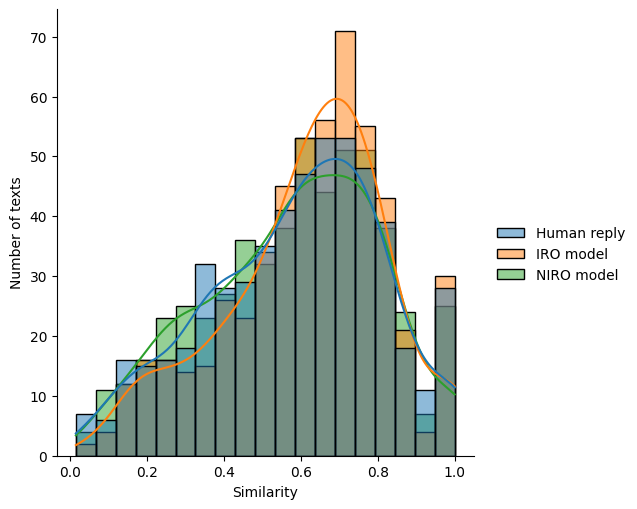

In [40]:
fig = sns.displot(similarity_text[["Human reply", "IRO model", "NIRO model"]],kde=True)
fig.set_axis_labels("Similarity", "Number of texts")
fig.savefig("/home/marem/VscProjects/theGIRLS/linguistic analysis/plots/similarity_parent_exp1.png")

##### means

In [26]:
list_parent = original_iro["parent_text"].astype(str).tolist()
list_text = original_iro["text"].astype(str).tolist()

list_similarities = []

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    computed_similarity = cosine_distance_wordembedding_method(parent_txt,txt)
    list_similarities.append(computed_similarity)

print("mean similarities original-iro -->", round(np.average(list_similarities),3))
print("mean similarities generated-iro-->", round(np.average(similarity_text["sim_generated_iro"].tolist()),3))
print()
print("std similarities original-iro -->", round(np.std(list_similarities),3))
print("std similarities generated-iro-->", round(np.std(similarity_text["sim_generated_iro"].tolist()),3))

mean similarities original-iro --> 0.584
mean similarities generated-iro--> 0.614

std similarities original-iro --> 0.206
std similarities generated-iro--> 0.211


In [27]:
list_parent = original_not["parent_text"].astype(str).tolist()
list_text = original_not["text"].astype(str).tolist()

list_similarities = []

for i in range(len(list_parent)):
    parent_txt = list_parent[i]
    txt = list_text[i]
    computed_similarity = cosine_distance_wordembedding_method(parent_txt,txt)
    list_similarities.append(computed_similarity)

print("mean similarities original-not -->", round(np.average(list_similarities),3))
print("mean similarities generated-not-->", round(np.average(similarity_text["sim_generated_not"].tolist()),3))
print()
print("std similarities original-not -->", round(np.std(list_similarities),3))
print("std similarities generated-not-->", round(np.std(similarity_text["sim_generated_not"].tolist()),3))


mean similarities original-not --> 0.585
mean similarities generated-not--> 0.578

std similarities original-not --> 0.234
std similarities generated-not--> 0.228


##### similarity text-generated

In [53]:
list_parent = df_iro["parent_text"].astype(str).tolist()
list_text = df_iro["text"].astype(str).tolist()
list_generated_iro = df_iro["aggregated"].astype(str).tolist()
list_generated_not = df_not["aggregated"].astype(str).tolist()
list_id = df_iro["id_original"].tolist()

list_sim_iro = []
list_sim_not = []
list_iro_not = []
dict_similarity = {}

for i in range(len(list_text)):
    txt = list_text[i]
    generated_txt_iro= list_generated_iro[i]
    generated_txt_not= list_generated_not[i]
    id = list_id[i]
    computed_similarity_generated_iro = cosine_distance_wordembedding_method(txt,generated_txt_iro)
    computed_similarity_generated_not = cosine_distance_wordembedding_method(txt,generated_txt_not)
    computed_similarity_generated = cosine_distance_wordembedding_method(generated_txt_iro,generated_txt_not)

    list_sim_iro.append(computed_similarity_generated_iro)
    list_sim_not.append(computed_similarity_generated_not)
    list_iro_not.append(computed_similarity_generated)
    
    dict_similarity[id]=[computed_similarity_generated_iro,computed_similarity_generated_not]

In [46]:
similarity_text = pd.DataFrame.from_dict(dict_similarity, orient="index", columns=["IRO model", "NIRO model"])

similarity_text.reset_index(inplace=True)
similarity_text.rename(columns={"index": "id_original"}, inplace=True)

In [55]:
print(np.std(list_iro_not))

0.22612470704882245


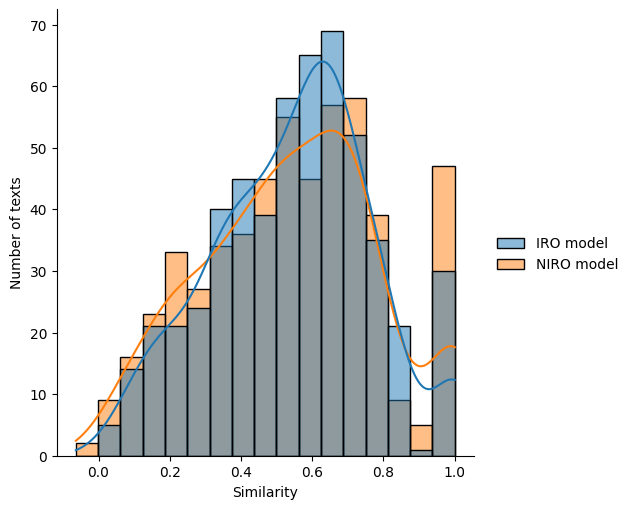

In [47]:
fig = sns.displot(similarity_text[["IRO model", "NIRO model"]],kde=True)
fig.set_axis_labels("Similarity", "Number of texts")
fig.savefig("/home/marem/VscProjects/theGIRLS/linguistic analysis/plots/similarity_parent_exp1.png")

##### similarity generated-generated

## Annotations

In [59]:
df_annotations = pd.read_csv("/home/marem/VscProjects/theGIRLS/annotation/E1_clean.csv", sep=",")

In [60]:
df_annotations

,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,attention_Disagree_50],attention_Agree_51],attention_Agree_52],attention_Strongly disagree_53],attention_Strongly agree_54],attention_Agree_55],attention_Disagree_56],attention_Strongly disagree_57],PROLIFIC_PID,all_attentions
0,2,30-05-24 22:44,30-05-24 22:46,IP Address,217.201.149.132,100,115,True,30-05-24 22:46,R_2ET5I27aWdfnBRx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6527d5e2e4a9568285c94649,2
1,3,30-05-24 22:50,30-05-24 22:55,IP Address,90.247.134.93,100,307,True,30-05-24 22:55,R_27yt3sOOXoeO71n,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,6658b14717b161dc426bd0f0,4
2,4,30-05-24 22:50,30-05-24 22:56,IP Address,86.15.36.30,100,367,True,30-05-24 22:56,R_8q8p8qFSxcvHNPZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6658df36550b0dbb233864ea,0
3,5,03-06-24 19:45,03-06-24 19:45,IP Address,86.10.105.253,100,4,True,03-06-24 19:45,R_8CLZ0ZaVvkH0GTn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6383b7d918eb0bcaf1047eed,0
4,6,03-06-24 19:41,03-06-24 19:46,IP Address,172.218.235.230,100,278,True,03-06-24 19:46,R_3bXb6EUkrjpwNAl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655e1de592bef9eaafd726db,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,123,03-06-24 20:46,03-06-24 20:46,IP Address,84.69.87.4,100,26,True,03-06-24 20:46,R_8p4ifYZpV6PmvWD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6458fe267afe71c7aa4de260,0
118,124,03-06-24 20:45,03-06-24 20:49,IP Address,90.202.148.14,100,217,True,03-06-24 20:49,R_8DI8htu97R4i9tV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5b90635a877eab0001d7ba9e,5
119,125,03-06-24 20:45,03-06-24 20:49,IP Address,82.6.221.137,100,236,True,03-06-24 20:49,R_8e28HSsm7h4WFCC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629f6b8c65fcae219e245284,2
120,126,03-06-24 20:47,03-06-24 21:19,IP Address,92.19.154.129,100,1932,True,03-06-24 21:19,R_8Jz2xbr7gMt0wyz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663e5dbb5370402d04233f92,1


In [61]:
col_names = df_annotations.columns.tolist()

col_id = [col for col in col_names if "ironic" in col or "notironic" in col]

In [62]:
# Usiamo melt per ristrutturare il dataframe
df_melted = df_annotations.melt(id_vars=["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)",
                  "Finished", "RecordedDate", "ResponseId", "RecipientLastName", "all_attentions",
                  'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                  'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
                  'UserLanguage', 'Q801', 'Q1108', "PROLIFIC_PID"], value_vars=col_id,
                    var_name="model_id", value_name="label")

# Separiamo la colonna "model_id" in due colonne "model" e "id"
df_melted[["model", "id_original"]] = df_melted["model_id"].str.split("_", expand=True)

# Riorganizziamo le colonne e ordiniamo per "date" per avere l'output desiderato
df_final = df_melted[["id_original", "PROLIFIC_PID", "Duration (in seconds)",
                  "Finished", "RecordedDate", "ResponseId", "all_attentions",
                    "model", "label"]].sort_values(by=["id_original","PROLIFIC_PID"])

In [63]:
df_final["id_original"] = df_final["id_original"].str.replace(']', '', regex=False)
df_final = df_final.dropna(subset="label")
df_final.reset_index(drop=True, inplace=True)

In [64]:
def get_aggregated_text(row):
    if row["model"] == "ironic":
        return df_iro.loc[df_iro["id_original"] == row["id_original"], "aggregated"].values[0]
    elif row["model"] == "notironic":
        return df_not.loc[df_not["id_original"] == row["id_original"], "aggregated"].values[0]
    else:
        return None

df_final = df_final.merge(df_iro[["parent_text", "text", "id_original"]], on="id_original")
df_final["aggregated"] = df_final.apply(get_aggregated_text, axis=1)

In [65]:
def convert_label(label):
    if label == "Strongly Disagree":
        return -2
    elif label == "Disagree":
        return -1
    elif label == "Neither Agree nor Disagree":
        return 0
    elif label == "Agree":
        return 1
    elif label == "Strongly Agree":
        return 2
    else:
        return "error"

df_final["score"] = df_final["label"].apply(convert_label)

In [66]:
df_final = df_final[['id_original', 'PROLIFIC_PID', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'all_attentions', 'parent_text', 'text',
       'aggregated','model', 'label','score']]

df_final.to_csv("E1_dataset_merge.csv")

In [68]:
df_final.shape

(3140, 13)

In [67]:
df_similarity = df_final.merge(similarity_text[["sim_generated_iro", "id_original"]], on="id_original")
df_similarity = df_final.merge(similarity_text[["sim_text", "id_original"]], on="id_original")

KeyError: "['sim_generated_iro'] not in index"

In [ ]:
list_id = similarity_text["id_original"].tolist()
list_similarity_iro = similarity_text["sim_generated_iro"].tolist()
list_similarity_text = similarity_text["sim_text"].tolist()

more_similar_iro = {}
id_more_similar_iro = []
id_more_similar_text = []

id_less_similar_iro = []
id_less_similar_text = []

for i in range(len(similarity_text)):
    id = list_id[i]
    if list_similarity_iro[i]>0.8:
        more_similar_iro[id] = list_similarity_iro[i]
        id_more_similar_iro.append(id)
    if list_similarity_text[i]>0.8:
        id_more_similar_text.append(id)
        
    if list_similarity_iro[i]<0.2:
        id_less_similar_iro.append(id)
    if list_similarity_text[i]<0.2:
        id_less_similar_text.append(id)    
    

iro_more_similar = df_similarity[df_similarity["id_original"].isin(id_more_similar_iro)]
iro_less_similar = df_similarity[df_similarity["id_original"].isin(id_less_similar_iro)]
iro_more_similar.to_csv(DIR + "theGIRLS/linguistic analysis/annotazione_manuale/annotazione_modelIRO_sim08.csv")

text_more_similar = df_similarity[df_similarity["id_original"].isin(id_more_similar_text)]
text_more_similar.to_csv(DIR + "theGIRLS/linguistic analysis/annotazione_manuale/annotazione_humanText_sim08.csv")

In [ ]:
print("all annotations considered")
print(df_similarity["label"].value_counts(normalize=True))
print()
print("generated texts less similar to the parent")
print(iro_less_similar["label"].value_counts(normalize=True))
print()
print("generated texts more similar to the parent")
print(iro_more_similar["label"].value_counts(normalize=True))

all annotations considered
label
Disagree                      0.312690
Agree                         0.245902
Strongly Disagree             0.218579
Neither Agree nor Disagree    0.138130
Strongly Agree                0.084699
Name: proportion, dtype: float64

generated texts less similar to the parent
label
Disagree                      0.312500
Strongly Disagree             0.270833
Agree                         0.223958
Neither Agree nor Disagree    0.151042
Strongly Agree                0.041667
Name: proportion, dtype: float64

generated texts more similar to the parent
label
Disagree                      0.326087
Agree                         0.235178
Strongly Disagree             0.211462
Neither Agree nor Disagree    0.150198
Strongly Agree                0.077075
Name: proportion, dtype: float64
